In [408]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
'''Ignore deprecation and future, and user warnings.'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

#import file
credit = pd.read_csv("dataset_31_credit-g.csv")

credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


Begin by importing libraries and looking at a snippet of the data.

Now we can extract more information about the data below:

In [409]:
print('Dimensions of train data:', credit.shape, "\n")
print('column names:')
print(credit.columns.values, "\n")
print('data types:')
display(credit.dtypes.value_counts())

Dimensions of train data: (1000, 21) 

column names:
['checking_status' 'duration' 'credit_history' 'purpose' 'credit_amount'
 'savings_status' 'employment' 'installment_commitment' 'personal_status'
 'other_parties' 'residence_since' 'property_magnitude' 'age'
 'other_payment_plans' 'housing' 'existing_credits' 'job' 'num_dependents'
 'own_telephone' 'foreign_worker' 'class'] 

data types:


object    14
int64      7
dtype: int64

In [410]:
#columns with missing observations
missing_columns = credit.columns[credit.isnull().any()].values
total_missing_columns = np.count_nonzero(credit.isnull().sum())
print('Number of features with missing values: ', total_missing_columns, ' names of features: ', missing_columns)

Number of features with missing values:  0  names of features:  []


There are no missing values in this dataset so we can continue without having to approximate missing values.


In [411]:
#Extracting numerical data
numerical_values = credit.select_dtypes(include = ['int64'])
display(numerical_values.head(3))
print('Numerical column names:')
print(numerical_values.columns.values)

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2


Numerical column names:
['duration' 'credit_amount' 'installment_commitment' 'residence_since'
 'age' 'existing_credits' 'num_dependents']


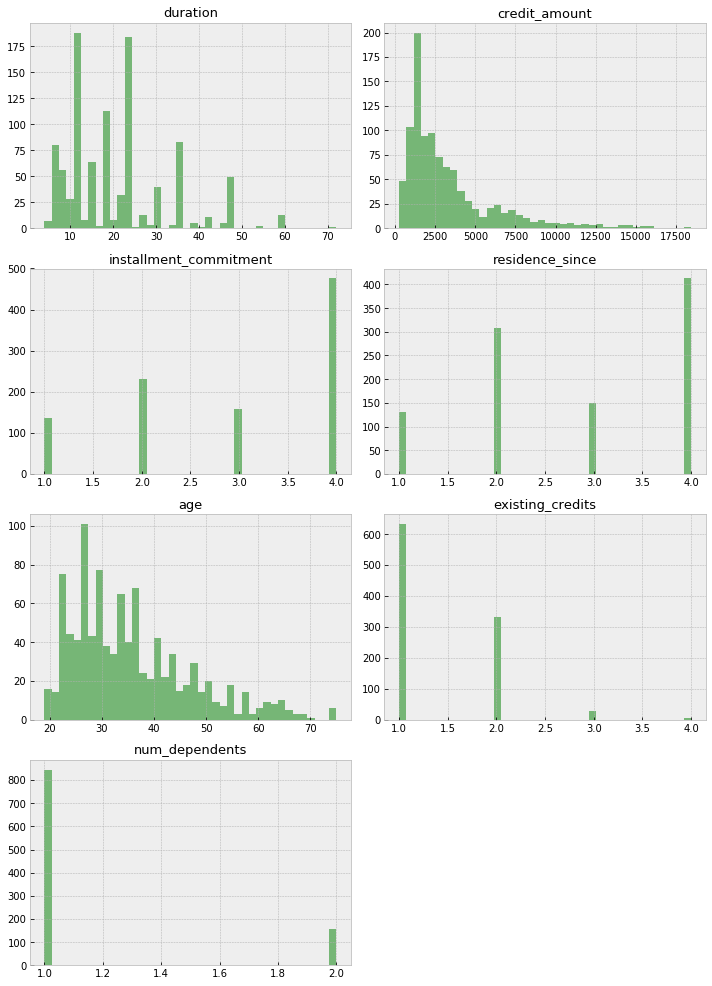

In [417]:
def draw_histograms(df, variables, n_rows, n_columns):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_columns,i+1)
        df[var_name].hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (10, 15))
        ax.set_title(var_name, fontsize = 13)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 10)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0, 0.03, 1, 0.95])  # Improves appearance a bit.
    plt.show()
    
draw_histograms(numerical_values, numerical_values.columns, 4, 2)

Visualising the numerical data reveals the data types of each column.
duration, credit_amount, age are continuous variables
The remaining are discrete, in this case we will transform ordinal data like this with label encoding, so no further action is required.

Below we can plot the numerical data, plotting good/bad classification with blue/red and plotting green as the 'expected' bad classification given the proportion of bad classifications in the overall data (3/7).

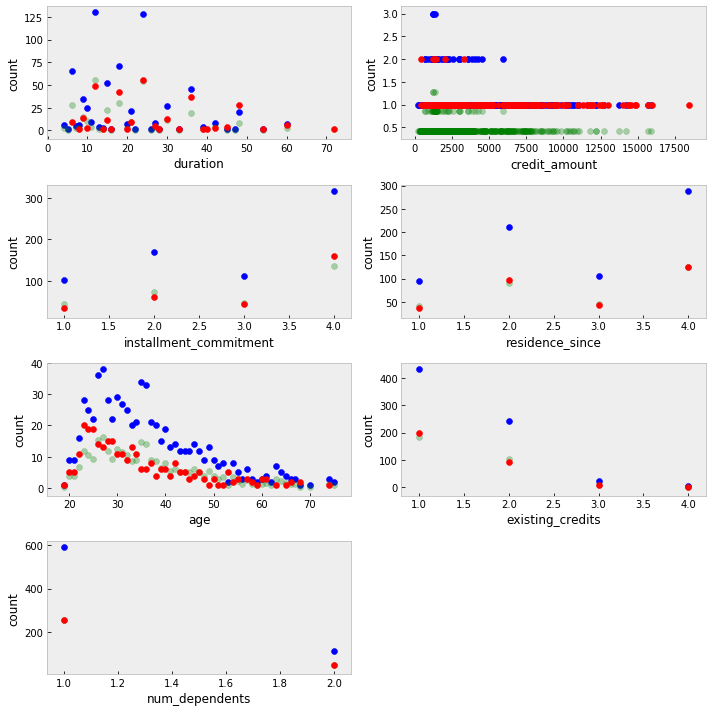

In [419]:
duration_stat = credit.groupby(["duration", "class"]).size().reset_index(name='Count')
duration_stat_table = duration_stat.pivot_table(values='Count',  columns=['class'],  index = "duration")
credit_stat = credit.groupby(["credit_amount", "class"]).size().reset_index(name='Count')
credit_stat_table = credit_stat.pivot_table(values='Count',  columns=['class'],  index = "credit_amount")
installment_stat = credit.groupby(["installment_commitment", "class"]).size().reset_index(name='Count')
installment_stat_table = installment_stat.pivot_table(values='Count',  columns=['class'],  index = "installment_commitment")
residence_stat = credit.groupby(["residence_since", "class"]).size().reset_index(name='Count')
residence_stat_table = residence_stat.pivot_table(values='Count',  columns=['class'],  index = "residence_since")
age_stat = credit.groupby(["age", "class"]).size().reset_index(name='Count')
age_stat_table = age_stat.pivot_table(values='Count',  columns=['class'],  index = "age")
excred_stat = credit.groupby(["existing_credits", "class"]).size().reset_index(name='Count')
excred_stat_table = excred_stat.pivot_table(values='Count',  columns=['class'],  index = "existing_credits")
numdep_stat = credit.groupby(["num_dependents", "class"]).size().reset_index(name='Count')
numdep_stat_table = numdep_stat.pivot_table(values='Count',  columns=['class'],  index = "num_dependents")

fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.subplot(4,2,1)
plt.scatter(duration_stat_table.index, duration_stat_table['good'].values, color='b')
plt.scatter(duration_stat_table.index, duration_stat_table['good'].values*(3/7), color='g', alpha = 0.3)
plt.scatter(duration_stat_table.index, duration_stat_table['bad'].values, color='r')
plt.xlabel('duration')
plt.ylabel('count')

plt.subplot(4,2,2)
plt.scatter(credit_stat_table.index, credit_stat_table['good'].values, color='b')
plt.scatter(credit_stat_table.index, credit_stat_table['good'].values*(3/7), color='g', alpha = 0.3)
plt.scatter(credit_stat_table.index, credit_stat_table['bad'].values, color='r')
plt.xlabel('credit_amount')
plt.ylabel('count')

plt.subplot(4,2,3)
plt.scatter(installment_stat_table.index, installment_stat_table['good'].values, color='b')
plt.scatter(installment_stat_table.index, installment_stat_table['good'].values*(3/7), color='g', alpha = 0.3)
plt.scatter(installment_stat_table.index, installment_stat_table['bad'].values, color='r')
plt.xlabel('installment_commitment')
plt.ylabel('count')

plt.subplot(4,2,4)
plt.scatter(residence_stat_table.index, residence_stat_table['good'].values, color='b')
plt.scatter(residence_stat_table.index, residence_stat_table['good'].values*(3/7), color='g', alpha = 0.3)
plt.scatter(residence_stat_table.index, residence_stat_table['bad'].values, color='r')
plt.xlabel('residence_since')
plt.ylabel('count')

plt.subplot(4,2,5)
plt.scatter(age_stat_table.index, age_stat_table['good'].values, color='b')
plt.scatter(age_stat_table.index, age_stat_table['good'].values*(3/7), color='g', alpha = 0.3)
plt.scatter(age_stat_table.index, age_stat_table['bad'].values, color='r')
plt.xlabel('age')
plt.ylabel('count')

plt.subplot(4,2,6)
plt.scatter(excred_stat_table.index, excred_stat_table['good'].values, color='b')
plt.scatter(excred_stat_table.index, excred_stat_table['good'].values*(3/7), color='g', alpha = 0.3)
plt.scatter(excred_stat_table.index, excred_stat_table['bad'].values, color='r')
plt.xlabel('existing_credits')
plt.ylabel('count')

plt.subplot(4,2,7)
plt.scatter(numdep_stat_table.index, numdep_stat_table['good'].values, color='b')
plt.scatter(numdep_stat_table.index, numdep_stat_table['good'].values*(3/7), color='g', alpha = 0.3)
plt.scatter(numdep_stat_table.index, numdep_stat_table['bad'].values, color='r')
plt.xlabel('num_dependents')
plt.ylabel('count')

plt.tight_layout()
plt.show()

It may be a good idea to remove credit amount, we will look at this later.
First we will look at categorical data.

In [420]:
#Extracting categorical data
categorical_values = credit.select_dtypes(include = ['object']).astype('category')
display(categorical_values.head(7))
print('categorical column names:')
print(categorical_values.columns.values)

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,'<0','critical/other existing credit',radio/tv,'no known savings','>=7','male single',none,'real estate',none,own,skilled,yes,yes,good
1,'0<=X<200','existing paid',radio/tv,'<100','1<=X<4','female div/dep/mar',none,'real estate',none,own,skilled,none,yes,bad
2,'no checking','critical/other existing credit',education,'<100','4<=X<7','male single',none,'real estate',none,own,'unskilled resident',none,yes,good
3,'<0','existing paid',furniture/equipment,'<100','4<=X<7','male single',guarantor,'life insurance',none,'for free',skilled,none,yes,good
4,'<0','delayed previously','new car','<100','1<=X<4','male single',none,'no known property',none,'for free',skilled,none,yes,bad
5,'no checking','existing paid',education,'no known savings','1<=X<4','male single',none,'no known property',none,'for free','unskilled resident',yes,yes,good
6,'no checking','existing paid',furniture/equipment,'500<=X<1000','>=7','male single',none,'life insurance',none,own,skilled,none,yes,good


categorical column names:
['checking_status' 'credit_history' 'purpose' 'savings_status'
 'employment' 'personal_status' 'other_parties' 'property_magnitude'
 'other_payment_plans' 'housing' 'job' 'own_telephone' 'foreign_worker'
 'class']


In [421]:
#Convert data for better visualisation.
check_stat = credit.groupby(["checking_status", "class"]).size().reset_index(name='Count')
check_stat_table = check_stat.pivot_table(values='Count',  columns=['class'],  index = "checking_status")
savings_stat = credit.groupby(["savings_status", "class"]).size().reset_index(name='Count')
savings_stat_table = pd.pivot_table(savings_stat,  values='Count',  columns=['class'],  index = "savings_status")
purpose_stat = credit.groupby(["purpose", "class"]).size().reset_index(name='Count')
purpose_stat_table = pd.pivot_table(purpose_stat,  values='Count',  columns=['class'],  index = "purpose")
employment_stat = credit.groupby(["employment", "class"]).size().reset_index(name='Count')
employment_stat_table = pd.pivot_table(employment_stat,  values='Count',  columns=['class'],  index = "employment")
personal_status_stat = credit.groupby(["personal_status", "class"]).size().reset_index(name='Count')
personal_status_stat_table = pd.pivot_table(personal_status_stat,  values='Count',  columns=['class'],  index = "personal_status")
other_parties_stat = credit.groupby(["other_parties", "class"]).size().reset_index(name='Count')
other_parties_stat_table = pd.pivot_table(other_parties_stat,  values='Count',  columns=['class'],  index = "other_parties")
property_magnitude_stat = credit.groupby(["property_magnitude", "class"]).size().reset_index(name='Count')
property_magnitude_stat_table = pd.pivot_table(property_magnitude_stat,  values='Count',  columns=['class'],  index = "property_magnitude")
other_payment_plans_stat = credit.groupby(["other_payment_plans", "class"]).size().reset_index(name='Count')
other_payment_plans_stat_table = pd.pivot_table(other_payment_plans_stat,  values='Count',  columns=['class'],  index = "other_payment_plans")
housing_stat = credit.groupby(["housing", "class"]).size().reset_index(name='Count')
housing_stat_table = pd.pivot_table(housing_stat,  values='Count',  columns=['class'],  index = "housing")
job_stat = credit.groupby(["job", "class"]).size().reset_index(name='Count')
job_stat_table = pd.pivot_table(job_stat,  values='Count',  columns=['class'],  index = "job")
own_telephone_stat = credit.groupby(["own_telephone", "class"]).size().reset_index(name='Count')
own_telephone_stat_table = pd.pivot_table(own_telephone_stat,  values='Count',  columns=['class'],  index = "own_telephone")
foreign_worker_stat = credit.groupby(["foreign_worker", "class"]).size().reset_index(name='Count')
foreign_worker_stat_table = pd.pivot_table(foreign_worker_stat,  values='Count',  columns=['class'],  index = "foreign_worker")


Text(0.5,1,'foreign_worker')

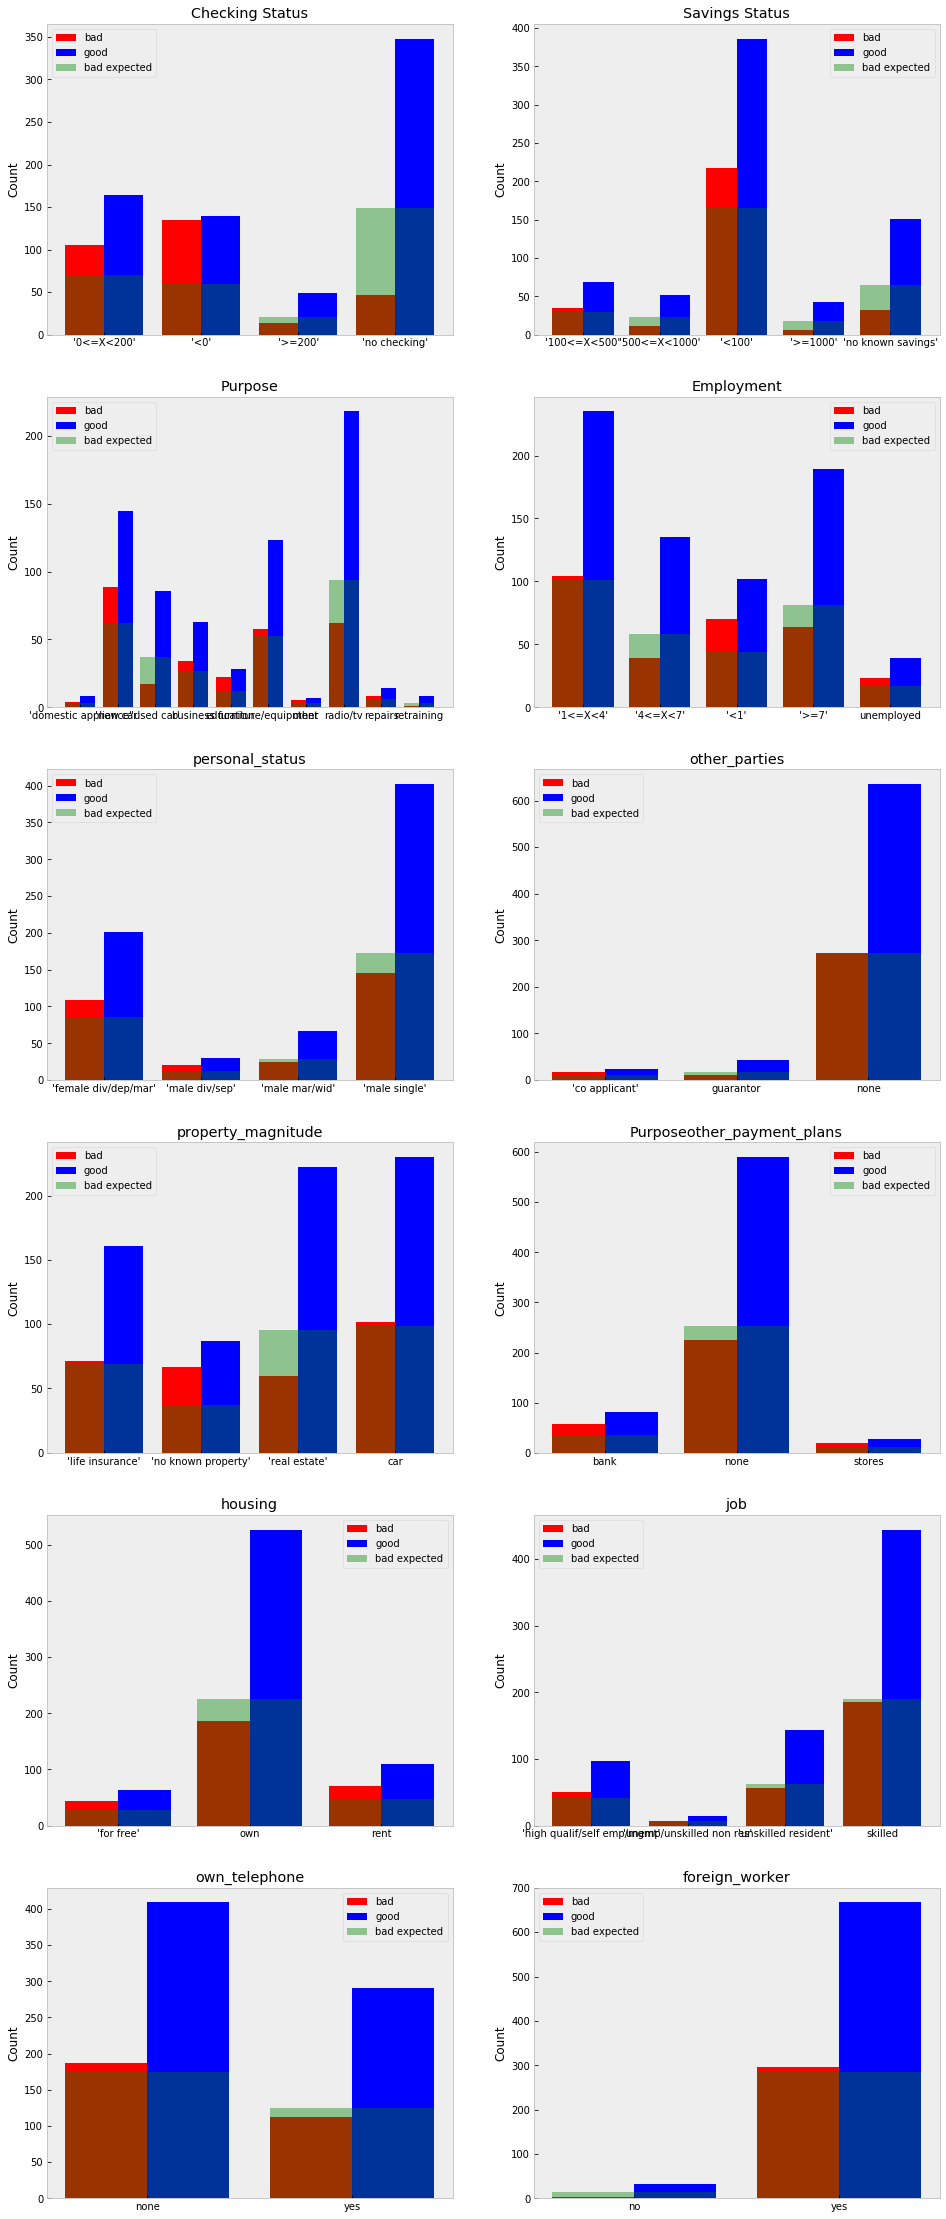

In [422]:
#PLOTTING
fig_size[0] = 16
fig_size[1] = 40
plt.rcParams["figure.figsize"] = fig_size
width = 0.4
x = np.arange(4)
ax = plt.subplot(6,2,1)
badplt = ax.bar(x, check_stat_table['bad'].values, width, color='r')
goodplt= ax.bar(x+width, check_stat_table['good'].values, width, color='b')
badExpplt = ax.bar(x+width/2, check_stat_table['good'].values * (3/7), 2*width, color='g', alpha=0.4)
ax.set_xticks(x+width/2)
ax.set_xticklabels(check_stat_table.index.values)
ax.legend((badplt[0], goodplt[0], badExpplt[0]), ('bad', 'good', 'bad expected'))
ax.set_ylabel('Count')
plt.title('Checking Status')

x = np.arange(5)
ax = plt.subplot(6,2,2)
badplt = ax.bar(x, savings_stat_table['bad'].values, width, color='r')
goodplt= ax.bar(x+width, savings_stat_table['good'].values, width, color='b')
badExpplt = ax.bar(x+width/2, savings_stat_table['good'].values * (3/7), 2*width, color='g', alpha=0.4)
ax.set_xticks(x+width/2)
ax.set_xticklabels(savings_stat_table.index.values)
ax.legend((badplt[0], goodplt[0], badExpplt[0]), ('bad', 'good', 'bad expected'))
ax.set_ylabel('Count')
plt.title('Savings Status')
 
x = np.arange(10)
ax = plt.subplot(6,2,3)
badplt = ax.bar(x, purpose_stat_table['bad'].values, width, color='r')
goodplt= ax.bar(x+width, purpose_stat_table['good'].values, width, color='b')
badExpplt = ax.bar(x+width/2, purpose_stat_table['good'].values * (3/7), 2*width, color='g', alpha=0.4)
ax.set_xticks(x+width/2)
ax.set_xticklabels(purpose_stat_table.index.values)
ax.legend((badplt[0], goodplt[0], badExpplt[0]), ('bad', 'good', 'bad expected'))
ax.set_ylabel('Count')
plt.title('Purpose')

x = np.arange(5)
ax = plt.subplot(6,2,4)
badplt = ax.bar(x, employment_stat_table['bad'].values, width, color='r')
goodplt= ax.bar(x+width, employment_stat_table['good'].values, width, color='b')
badExpplt = ax.bar(x+width/2, employment_stat_table['good'].values * (3/7), 2*width, color='g', alpha=0.4)
ax.set_xticks(x+width/2)
ax.set_xticklabels(employment_stat_table.index.values)
ax.legend((badplt[0], goodplt[0], badExpplt[0]), ('bad', 'good', 'bad expected'))
ax.set_ylabel('Count')
plt.title('Employment')

x = np.arange(4)
ax = plt.subplot(6,2,5)
badplt = ax.bar(x, personal_status_stat_table['bad'].values, width, color='r')
goodplt= ax.bar(x+width, personal_status_stat_table['good'].values, width, color='b')
badExpplt = ax.bar(x+width/2, personal_status_stat_table['good'].values * (3/7), 2*width, color='g', alpha=0.4)
ax.set_xticks(x+width/2)
ax.set_xticklabels(personal_status_stat_table.index.values)
ax.legend((badplt[0], goodplt[0], badExpplt[0]), ('bad', 'good', 'bad expected'))
ax.set_ylabel('Count')
plt.title('personal_status')

x = np.arange(3)
ax = plt.subplot(6,2,6)
badplt = ax.bar(x, other_parties_stat_table['bad'].values, width, color='r')
goodplt= ax.bar(x+width, other_parties_stat_table['good'].values, width, color='b')
badExpplt = ax.bar(x+width/2, other_parties_stat_table['good'].values * (3/7), 2*width, color='g', alpha=0.4)
ax.set_xticks(x+width/2)
ax.set_xticklabels(other_parties_stat_table.index.values)
ax.legend((badplt[0], goodplt[0], badExpplt[0]), ('bad', 'good', 'bad expected'))
ax.set_ylabel('Count')
plt.title('other_parties')

x = np.arange(4)
ax = plt.subplot(6,2,7)
badplt = ax.bar(x, property_magnitude_stat_table['bad'].values, width, color='r')
goodplt= ax.bar(x+width, property_magnitude_stat_table['good'].values, width, color='b')
badExpplt = ax.bar(x+width/2, property_magnitude_stat_table['good'].values * (3/7), 2*width, color='g', alpha=0.4)
ax.set_xticks(x+width/2)
ax.set_xticklabels(property_magnitude_stat_table.index.values)
ax.legend((badplt[0], goodplt[0], badExpplt[0]), ('bad', 'good', 'bad expected'))
ax.set_ylabel('Count')
plt.title('property_magnitude')

x = np.arange(3)
ax = plt.subplot(6,2,8)
badplt = ax.bar(x, other_payment_plans_stat_table['bad'].values, width, color='r')
goodplt= ax.bar(x+width, other_payment_plans_stat_table['good'].values, width, color='b')
badExpplt = ax.bar(x+width/2, other_payment_plans_stat_table['good'].values * (3/7), 2*width, color='g', alpha=0.4)
ax.set_xticks(x+width/2)
ax.set_xticklabels(other_payment_plans_stat_table.index.values)
ax.legend((badplt[0], goodplt[0], badExpplt[0]), ('bad', 'good', 'bad expected'))
ax.set_ylabel('Count')
plt.title('Purposeother_payment_plans')

x = np.arange(3)
ax = plt.subplot(6,2,9)
badplt = ax.bar(x, housing_stat_table['bad'].values, width, color='r')
goodplt= ax.bar(x+width, housing_stat_table['good'].values, width, color='b')
badExpplt = ax.bar(x+width/2, housing_stat_table['good'].values * (3/7), 2*width, color='g', alpha=0.4)
ax.set_xticks(x+width/2)
ax.set_xticklabels(housing_stat_table.index.values)
ax.legend((badplt[0], goodplt[0], badExpplt[0]), ('bad', 'good', 'bad expected'))
ax.set_ylabel('Count')
plt.title('housing')

x = np.arange(4)
ax = plt.subplot(6,2,10)
badplt = ax.bar(x, job_stat_table['bad'].values, width, color='r')
goodplt= ax.bar(x+width, job_stat_table['good'].values, width, color='b')
badExpplt = ax.bar(x+width/2, job_stat_table['good'].values * (3/7), 2*width, color='g', alpha=0.4)
ax.set_xticks(x+width/2)
ax.set_xticklabels(job_stat_table.index.values)
ax.legend((badplt[0], goodplt[0], badExpplt[0]), ('bad', 'good', 'bad expected'))
ax.set_ylabel('Count')
plt.title('job')

x = np.arange(2)
ax = plt.subplot(6,2,11)
badplt = ax.bar(x, own_telephone_stat_table['bad'].values, width, color='r')
goodplt= ax.bar(x+width, own_telephone_stat_table['good'].values, width, color='b')
badExpplt = ax.bar(x+width/2, own_telephone_stat_table['good'].values * (3/7), 2*width, color='g', alpha=0.4)
ax.set_xticks(x+width/2)
ax.set_xticklabels(own_telephone_stat_table.index.values)
ax.legend((badplt[0], goodplt[0], badExpplt[0]), ('bad', 'good', 'bad expected'))
ax.set_ylabel('Count')
plt.title('own_telephone')

x = np.arange(2)
ax = plt.subplot(6,2,12)
badplt = ax.bar(x, foreign_worker_stat_table['bad'].values, width, color='r')
goodplt= ax.bar(x+width, foreign_worker_stat_table['good'].values, width, color='b')
badExpplt = ax.bar(x+width/2, foreign_worker_stat_table['good'].values * (3/7), 2*width, color='g', alpha=0.4)
ax.set_xticks(x+width/2)
ax.set_xticklabels(foreign_worker_stat_table.index.values)
ax.legend((badplt[0], goodplt[0], badExpplt[0]), ('bad', 'good', 'bad expected'))
ax.set_ylabel('Count')
plt.title('foreign_worker')


The above data shows that some values may be more or less useless for prediction, these are:
other parties
own telephone
foreign worker
We could potentially remove these without a large loss of accuracy in the model.

In [423]:
#replacing values with label encoding
categorical_values.checking_status.replace(to_replace = ["'no checking'", "'<0'", "'0<=X<200'", "'>=200'"],
                                           value = [0, 1, 2, 3], inplace = True)

categorical_values.credit_history.replace(to_replace = ["'critical/other existing credit'", "'delayed previously'",
                                                        "'existing paid'", "'no credits/all paid'", "'all paid'"],
                                                       value = [0, 1, 2, 3, 4], inplace = True)

categorical_values.savings_status.replace(to_replace = ["'no known savings'", "'<100'", "'100<=X<500'", "'500<=X<1000'",
                                                        "'>=1000'"], value = [0, 1, 2, 3, 4], inplace = True)

categorical_values.employment.replace(to_replace = ["unemployed", "'<1'", "'1<=X<4'", "'4<=X<7'",
                                                        "'>=7'"], value = [0, 1, 2, 3, 4], inplace = True)

#One-Hot better with these
#purpose
#personal status
#other parties
#property magnitude
#other payment plans

categorical_values.housing.replace(to_replace = ["'for free'", "rent", "own"], value = [0, 1, 2], inplace = True)

categorical_values.job.replace(to_replace = ["'unemp/unskilled non res'", "'unskilled resident'", "skilled", "'high qualif/self emp/mgmt'"],
                               value = [0, 1, 2, 3], inplace = True)
                               
categorical_values.own_telephone.replace(to_replace = ["none", "yes"], value = [0, 1], inplace = True)
categorical_values.foreign_worker.replace(to_replace = ["no", "yes"], value = [0, 1], inplace = True)
categorical_values['class'].replace(to_replace = ["bad", "good"], value = [0, 1], inplace = True)

display(categorical_values.head(5))

encoded_values = categorical_values.select_dtypes(include = ['int64'])

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,1,0,radio/tv,0,4,'male single',none,'real estate',none,2,2,1,1,1
1,2,2,radio/tv,1,2,'female div/dep/mar',none,'real estate',none,2,2,0,1,0
2,0,0,education,1,3,'male single',none,'real estate',none,2,1,0,1,1
3,1,2,furniture/equipment,1,3,'male single',guarantor,'life insurance',none,0,2,0,1,1
4,1,1,'new car',1,2,'male single',none,'no known property',none,0,2,0,1,0


Above is the transformation of ordinal data via label encoding, this will be sufficient to work with our models.
Below the remaining nominal data will be transformed using one-hot encoding, as there is no clear order to this data.
I will also check that this conversion has been done correctly, i.e all categories are represented in a column.

In [424]:
#one hotting nominal data
one_hot_values = categorical_values.select_dtypes(include = ['category'])
display(one_hot_values.head(5))
one_hot_values = pd.get_dummies(one_hot_values, drop_first=False)
display(one_hot_values.head(5))
display(one_hot_values.columns.values)

,purpose,personal_status,other_parties,property_magnitude,other_payment_plans
0,radio/tv,'male single',none,'real estate',none
1,radio/tv,'female div/dep/mar',none,'real estate',none
2,education,'male single',none,'real estate',none
3,furniture/equipment,'male single',guarantor,'life insurance',none
4,'new car','male single',none,'no known property',none


,purpose_'domestic appliance',purpose_'new car',purpose_'used car',purpose_business,purpose_education,purpose_furniture/equipment,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,...,other_parties_'co applicant',other_parties_guarantor,other_parties_none,property_magnitude_'life insurance',property_magnitude_'no known property',property_magnitude_'real estate',property_magnitude_car,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


array(["purpose_'domestic appliance'", "purpose_'new car'",
       "purpose_'used car'", 'purpose_business', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_other', 'purpose_radio/tv',
       'purpose_repairs', 'purpose_retraining',
       "personal_status_'female div/dep/mar'",
       "personal_status_'male div/sep'", "personal_status_'male mar/wid'",
       "personal_status_'male single'", "other_parties_'co applicant'",
       'other_parties_guarantor', 'other_parties_none',
       "property_magnitude_'life insurance'",
       "property_magnitude_'no known property'",
       "property_magnitude_'real estate'", 'property_magnitude_car',
       'other_payment_plans_bank', 'other_payment_plans_none',
       'other_payment_plans_stores'], dtype=object)

In [425]:
#merge encoded and on hotted values
categorical_merged = pd.concat([encoded_values, one_hot_values], axis=1)
#merge above with numerical data
credit_fixed = pd.concat([categorical_merged, numerical_values], axis=1)
display(credit_fixed.head(5))
credit_fixed.shape

,checking_status,credit_history,savings_status,employment,housing,job,own_telephone,foreign_worker,class,purpose_'domestic appliance',...,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,1,0,0,4,2,2,1,1,1,0,...,0,1,0,6,1169,4,4,67,2,1
1,2,2,1,2,2,2,0,1,0,0,...,0,1,0,48,5951,2,2,22,1,1
2,0,0,1,3,2,1,0,1,1,0,...,0,1,0,12,2096,2,3,49,1,2
3,1,2,1,3,0,2,0,1,1,0,...,0,1,0,42,7882,2,4,45,1,2
4,1,1,1,2,0,2,0,1,0,0,...,0,1,0,24,4870,3,4,53,2,2


(1000, 40)

In [426]:
'''set a seed for reproducibility'''
seed = 44

'''Initialize all the regesssion models object we are interested in'''
from sklearn import tree
from sklearn.svm import SVR
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn import neighbors
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


Below you could drop these columns as they are more or less useless, this is optional.

In [404]:
display(credit_fixed.head())
credit_fixed.drop('own_telephone', 1, inplace=True)
credit_fixed.drop('foreign_worker', 1, inplace=True)
credit_fixed.drop('other_payment_plans_bank', 1, inplace=True)
credit_fixed.drop('other_payment_plans_none', 1, inplace=True)
credit_fixed.drop('other_payment_plans_stores', 1, inplace=True)
credit_fixed.drop("other_parties_'co applicant'", 1, inplace=True)
credit_fixed.drop('other_parties_guarantor', 1, inplace=True)
credit_fixed.drop('other_parties_none', 1, inplace=True)
#credit_fixed.drop('credit_amount', 1, inplace= True)
display(credit_fixed.columns)

,checking_status,credit_history,savings_status,employment,housing,job,own_telephone,foreign_worker,class,purpose_'domestic appliance',...,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,1,0,0,4,2,2,1,1,1,0,...,0,1,0,6,1169,4,4,67,2,1
1,2,2,1,2,2,2,0,1,0,0,...,0,1,0,48,5951,2,2,22,1,1
2,0,0,1,3,2,1,0,1,1,0,...,0,1,0,12,2096,2,3,49,1,2
3,1,2,1,3,0,2,0,1,1,0,...,0,1,0,42,7882,2,4,45,1,2
4,1,1,1,2,0,2,0,1,0,0,...,0,1,0,24,4870,3,4,53,2,2


Index(['checking_status', 'credit_history', 'savings_status', 'employment',
       'housing', 'job', 'class', 'purpose_'domestic appliance'',
       'purpose_'new car'', 'purpose_'used car'', 'purpose_business',
       'purpose_education', 'purpose_furniture/equipment', 'purpose_other',
       'purpose_radio/tv', 'purpose_repairs', 'purpose_retraining',
       'personal_status_'female div/dep/mar'',
       'personal_status_'male div/sep'', 'personal_status_'male mar/wid'',
       'personal_status_'male single'', 'property_magnitude_'life insurance'',
       'property_magnitude_'no known property'',
       'property_magnitude_'real estate'', 'property_magnitude_car',
       'duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')

In [405]:
#Separate data into labels and features
labels = credit_fixed['class']
features = credit_fixed.drop('class', 1)

X_train, X_test, y_train, y_test = train_test_split(features.values,
                                                          labels.values,
                                                          test_size=0.2,
                                                          random_state=42)

Splitting data into train and test data.
Below using k-fold validation to train model, incase the 1000 sample size is too small, in this case it does not seem to be.

In [406]:
def k_fold(X_t, y_t, model, fold = 5):
    scores = []
    kf = ms.KFold(n_splits=fold, shuffle=True)
    for train_index, test_index in kf.split(X_t):
        #print("Train Index: ", train_index, "\n")
        #print("Test Index: ", test_index)
        X_train, X_test, y_train, y_test = X_t[train_index], X_t[test_index], y_t[train_index], y_t[test_index]
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
    return scores, model

gnb = GaussianNB()
scores, model = k_fold(X_train, y_train, gnb)
prediction = model.predict(X_test)
#print(scores)
print('GaussianNB Accuracy: ', accuracy_score(y_test, prediction))

logmodel = LogisticRegression()
scores, model = k_fold(X_train, y_train, logmodel)
prediction = logmodel.predict(X_test)
#print(scores)
print("LogReg Accuracy:",accuracy_score(y_test, prediction))

svrmodel = svm.SVC()
scores, model = k_fold(X_train, y_train, svrmodel)
prediction = svrmodel.predict(X_test)
#print(scores)
print("SVM Classifier Accuracy:",accuracy_score(y_test, prediction))

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
scores, model = k_fold(X_train, y_train, RF)
prediction = RF.predict(X_test)
#print(scores)
print("Random Forest Accuracy:",accuracy_score(y_test, prediction))

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
scores, model = k_fold(X_train, y_train, NN)
prediction = NN.predict(X_test)
#print(scores)
print("Neural Network Accuracy:",accuracy_score(y_test, prediction))

DTC = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
scores, model = k_fold(X_train, y_train, DTC)
prediction = DTC.predict(X_test)
#print(scores)
print("Decision Tree Accuracy:",accuracy_score(y_test, prediction))

XGB = XGBClassifier()
scores, model = k_fold(X_train, y_train, XGB)
prediction = XGB.predict(X_test)
#print(scores)
print("XGBoost Accuracy:",accuracy_score(y_test, prediction))

NearNeigh = neighbors.KNeighborsClassifier()
scores, model = k_fold(X_train, y_train, NearNeigh)
prediction = NearNeigh.predict(X_test)
#print(scores)
print("Nearest Neighbour Accuracy:",accuracy_score(y_test, prediction))

SGD = OneVsRestClassifier(SGDClassifier())
scores, model = k_fold(X_train, y_train, SGD)
prediction = SGD.predict(X_test)
#print(scores)
print("SGD Accuracy:",accuracy_score(y_test, prediction))

GaussianNB Accuracy:  0.71
LogReg Accuracy: 0.755
SVM Classifier Accuracy: 0.705
Random Forest Accuracy: 0.705
Neural Network Accuracy: 0.705
Decision Tree Accuracy: 0.715
XGBoost Accuracy: 0.805
Nearest Neighbour Accuracy: 0.64
SGD Accuracy: 0.705


Equivalent results achieved without k=fold below:

In [407]:
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
prediction = model.predict(X_test)
print('GaussianNB Accuracy: ', accuracy_score(y_test, prediction))

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
prediction = logmodel.predict(X_test)
print("LogReg Accuracy:",accuracy_score(y_test, prediction))

svrmodel = svm.SVC()
svrmodel.fit(X_train, y_train)
prediction = svrmodel.predict(X_test)
print("SVM Classifier Accuracy:",accuracy_score(y_test, prediction))

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X_train, y_train)
prediction = RF.predict(X_test)
print("Random Forest Accuracy:",accuracy_score(y_test, prediction))

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
NN.fit(X_train, y_train)
prediction = NN.predict(X_test)
print("Neural Network Accuracy:",accuracy_score(y_test, prediction))

DTC = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
DTC.fit(X_train, y_train)
prediction = DTC.predict(X_test)
print("Decision Tree Accuracy:",accuracy_score(y_test, prediction))

XGB = XGBClassifier()
XGB.fit(X_train, y_train)
prediction = XGB.predict(X_test)
print("XGBoost Accuracy:",accuracy_score(y_test, prediction))

NearNeigh = neighbors.KNeighborsClassifier()
NearNeigh.fit(X_train, y_train)
prediction = NearNeigh.predict(X_test)
print("Nearest Neighbour Accuracy:",accuracy_score(y_test, prediction))

SGD = OneVsRestClassifier(SGDClassifier())
SGD.fit(X_train, y_train)
prediction = SGD.predict(X_test)
print("SGD Accuracy:",accuracy_score(y_test, prediction))

GaussianNB Accuracy:  0.705
LogReg Accuracy: 0.75
SVM Classifier Accuracy: 0.705
Random Forest Accuracy: 0.705
Neural Network Accuracy: 0.705
Decision Tree Accuracy: 0.745
XGBoost Accuracy: 0.785
Nearest Neighbour Accuracy: 0.68
SGD Accuracy: 0.295


So given the results XGBoost is always the clear winner with 78.5% accuracy.

Below are some spare visualisation methods.

In [260]:
def visualisation1(credit):
    print(credit.groupby('class').size())
    print(" ")
    print(credit.groupby('checking_status').size())
    print(" ")
    print(credit.groupby('credit_history').size())
    print(" ")
    print(credit.groupby('purpose').size())
    print(" ")
    print(credit.groupby('savings_status').size())
    print(" ")
    print(credit.groupby('employment').size())
    print(" ")
    print(credit.groupby('personal_status').size())
    print(" ")
    print(credit.groupby('other_parties').size())
    print(" ")
    print(credit.groupby('property_magnitude').size())
    print(" ")
    print(credit.groupby('other_payment_plans').size())
    print(" ")
    print(credit.groupby('housing').size())
    print(" ")
    print(credit.groupby('job').size())
    print(" ")
    print(credit.groupby('own_telephone').size())
    print(" ")
    print(credit.groupby('foreign_worker').size())
    print(" ")
    print(" ")
    
    #names = credit['checking_status'].unique()
    #plt.bar(credit['checking_status'], (credit['class'] == 'good').count())

def visualisation2(credit):
    
    # Gets figure size
    fig_size = plt.rcParams["figure.figsize"]
    # Sets figure size
    fig_size[0] = 25
    fig_size[1] = 23
    plt.rcParams["figure.figsize"] = fig_size
    plt.suptitle('Count of categories')
    plt.subplot(4,3,1)
    plt.bar(credit['checking_status'].unique(), credit['checking_status'].value_counts())
    plt.title('1')
    plt.xlabel('checking status')
    plt.ylabel('count')
    
    plt.subplot(4,3,2)
    plt.bar(credit['savings_status'].unique(), credit['savings_status'].value_counts())
    plt.title('2')
    plt.xlabel('savings status')
    plt.ylabel('count')
    
    plt.subplot(4,3,3)
    plt.bar(credit['employment'].unique(), credit['employment'].value_counts())
    plt.title('3')
    plt.xlabel('employment')
    plt.ylabel('count')
    
    plt.subplot(4,3,4)
    plt.bar(credit['personal_status'].unique(), credit['personal_status'].value_counts())
    plt.title('4')
    plt.xlabel('personal_status')
    plt.ylabel('count')
    
    plt.subplot(4,3,5)
    plt.bar(credit['other_parties'].unique(), credit['other_parties'].value_counts())
    plt.title('5')
    plt.xlabel('other_parties')
    plt.ylabel('count')
    
    plt.subplot(4,3,6)
    plt.bar(credit['property_magnitude'].unique(), credit['property_magnitude'].value_counts())
    plt.title('6')
    plt.xlabel('property_magnitude')
    plt.ylabel('count')
    
    plt.subplot(4,3,7)
    plt.bar(credit['other_payment_plans'].unique(), credit['other_payment_plans'].value_counts())
    plt.title('7')
    plt.xlabel('other_payment_plans')
    plt.ylabel('count')
    
    plt.subplot(4,3,8)
    plt.bar(credit['housing'].unique(), credit['housing'].value_counts())
    plt.title('8')
    plt.xlabel('housing')
    plt.ylabel('count')
    
    plt.subplot(4,3,9)
    plt.bar(credit['job'].unique(), credit['job'].value_counts())
    plt.title('9')
    plt.xlabel('job')
    plt.ylabel('count')
    
    plt.subplot(4,3,10)
    plt.bar(credit['own_telephone'].unique(), credit['own_telephone'].value_counts())
    plt.title('10')
    plt.xlabel('own_telephone')
    plt.ylabel('count')
    
    plt.subplot(4,3,11)
    plt.bar(credit['foreign_worker'].unique(), credit['foreign_worker'].value_counts())
    plt.title('11')
    plt.xlabel('foreign_worker')
    plt.ylabel('count')
    
    plt.subplot(4,3,12)
    plt.bar(credit['class'].unique(), credit['class'].value_counts())
    plt.title('12')
    plt.xlabel('class')
    plt.ylabel('count')
   
visualisation1(credit)

class
bad     300
good    700
dtype: int64
 
checking_status
'0<=X<200'       269
'<0'             274
'>=200'           63
'no checking'    394
dtype: int64
 
credit_history
'all paid'                           49
'critical/other existing credit'    293
'delayed previously'                 88
'existing paid'                     530
'no credits/all paid'                40
dtype: int64
 
purpose
'domestic appliance'     12
'new car'               234
'used car'              103
business                 97
education                50
furniture/equipment     181
other                    12
radio/tv                280
repairs                  22
retraining                9
dtype: int64
 
savings_status
'100<=X<500'          103
'500<=X<1000'          63
'<100'                603
'>=1000'               48
'no known savings'    183
dtype: int64
 
employment
'1<=X<4'      339
'4<=X<7'      174
'<1'          172
'>=7'         253
unemployed     62
dtype: int64
 
personal_status
'female div/dep

In [ ]:
def scatter_plot(x, y, title, xaxis, yaxis, size, c_scale):
    trace = go.Scatter(x = x,
                        y = y,
                        mode = 'markers',
                        marker = dict(color = y, size=size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode = 'closest', title = title, xaxis = dict(title = xaxis), yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

'''Function to plot bar chart'''
def bar_plot(x, y, title, yaxis, c_scale):
    trace = go.Bar(x = x,
                   y = y,
                   marker = dict(color = y, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

'''Function to plot histogram'''
def histogram_plot(x, title, yaxis, color):
    trace = go.Histogram(x = x,
                        marker = dict(color = color))
    layout = go.Layout(hovermode = 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)